## Order and Online customer behavior data analytics

In [100]:
# All basic imports
import numpy as np
import pandas as pd
import os
import zipfile

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [15,10]
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

In [102]:
# Read Data
onlineData = pd.read_csv("online.csv")
orderData = pd.read_csv("order.csv")

## Exploration and understanding of the data sets

In [113]:
onlineData.head()

,session,visitor,dt,custno,category,event1,event2
0,419542,140970,2016-09-16 05:03:23,3840,1,NaN,1
1,3030130,14501,2017-11-13 04:58:12,70400,1,NaN,1
2,2638740,419353,2017-05-24 16:10:38,21248,1,NaN,1
3,880408,90673,2017-10-28 13:42:38,39168,1,NaN,1
4,2612179,191542,2016-05-17 06:30:32,47616,1,NaN,1


In [114]:
orderData.head()

,custno,ordno,orderdate,prodcat2,prodcat1,revenue
0,18944,64694,2016-11-27 20:57:20,NaN,1,53.30
1,18944,114405,2017-04-29 20:18:04,NaN,1,0.10
2,18944,28906,2017-04-23 21:31:03,NaN,1,141.66
3,36096,62681,2016-02-25 07:16:33,NaN,1,36.82
4,1,1,2017-06-12 08:27:59,NaN,1,8.35


My Assumptions is that online browsing category is our target variable. Our objective is to create a data set by merging online session activies to its corresponding conversion result in orders table and use the attribtues of converstion information to train a predictive model.

Vistiors ids are the devices used by the respective customer to interact with the website or the mobile application. Session ids are the session keys which indentify the session inactivity. If user does not interact for more than 30 mins a new session key is created for that visitor id if the customers has chosen to return to the site or the application.

In [120]:
print(" There are in total " + str(len(onlineData.custno.unique())) + " unique customers in online data")
print(" There are in total " + str(len(orderData.custno.unique())) + " unique customers in orders data")

 There are in total 57584 unique customers in online data
 There are in total 70264 unique customers in orders data


In [119]:
# created a separate columns for data and time for future use

onlineData['date'] = onlineData.dt.apply(lambda x : x[0:10])
onlineData['time'] = onlineData.dt.apply(lambda x : x[11:])

orderData['date'] = orderData.orderdate.apply(lambda x : x[0:10])
orderData['time'] = orderData.orderdate.apply(lambda x : x[11:])

In [121]:
# deleting the datetimes columns

del orderData['orderdate']
del onlineData['dt']

There are various instances where an order does not have the session activity info in the online data, for instance:

### Custno 1

In [129]:
#Result 1
onlineData[(onlineData.custno == 1) ]

,session,visitor,custno,category,event1,event2,date,time


In [130]:
#Result 2
orderData[(orderData.custno == 1)]

,custno,ordno,prodcat2,prodcat1,revenue,date,time
4,1,1,NaN,1,8.35,2017-06-12,08:27:59


Example of an instance which has the online active data on the same day by online activity was logged after order was purchased

### Custno 637

In [133]:
#Result 1
onlineData[(onlineData.custno == 637) & (onlineData.date == "2017-10-04")]

,session,visitor,custno,category,event1,event2,date,time
71874,9,405166,637,2,NaN,3,2017-10-04,13:36:14
135720,9,405166,637,2,NaN,7,2017-10-04,13:07:03


In [134]:
#Result 2
orderData[(orderData.custno == 637) & (orderData.date == "2017-10-04")]

,custno,ordno,prodcat2,prodcat1,revenue,date,time
153499,637,84765,25.0,7,68.48,2017-10-04,02:08:35
166738,637,151367,30.0,3,119.46,2017-10-04,13:47:35


If you refer the result 2 index 153499, there was no online activity logged before that order. Whereas in result 1 we see that there are two activites logged within 30 mins period having same session id. 

Later there was a purchase made by the customer on 13:47:35, approximately after 10 mins.

In [ ]:
Therefore I will be filtering records of online sessi

## Feature engineering

## Feature selection


## Model design and sampling


## Model generation


## Model evaluation

In [11]:
onlineData[(onlineData.custno == 637) & (onlineData.date == "2017-10-04")]

,session,visitor,custno,category,event1,event2,date,time
71874,9,405166,637,2,NaN,3,2017-10-04,13:36:14
135720,9,405166,637,2,NaN,7,2017-10-04,13:07:03


In [12]:
orderData[(orderData.custno == 637) & (orderData.date == "2017-10-04")]

,custno,ordno,prodcat2,prodcat1,revenue,date,time
153499,637,84765,25.0,7,68.48,2017-10-04,02:08:35
166738,637,151367,30.0,3,119.46,2017-10-04,13:47:35


In [13]:
onlineData.head()

,session,visitor,custno,category,event1,event2,date,time
0,419542,140970,3840,1,NaN,1,2016-09-16,05:03:23
1,3030130,14501,70400,1,NaN,1,2017-11-13,04:58:12
2,2638740,419353,21248,1,NaN,1,2017-05-24,16:10:38
3,880408,90673,39168,1,NaN,1,2017-10-28,13:42:38
4,2612179,191542,47616,1,NaN,1,2016-05-17,06:30:32


In [77]:
orderData[(orderData.date == "2016-08-17") &(orderData.custno == 3844)]

,custno,ordno,prodcat2,prodcat1,revenue,date,time
159984,3844,42965,28.0,7,33.98,2016-08-17,18:33:05
232942,3844,42965,94.0,7,50.02,2016-08-17,18:33:05


In [117]:
onlineData[(onlineData.date == "2017-05-24") & (onlineData.custno == 21248)]

AttributeError: 'DataFrame' object has no attribute 'date'

In [16]:
orderData.head(7)

,custno,ordno,prodcat2,prodcat1,revenue,date,time
0,18944,64694,NaN,1,53.30,2016-11-27,20:57:20
1,18944,114405,NaN,1,0.10,2017-04-29,20:18:04
2,18944,28906,NaN,1,141.66,2017-04-23,21:31:03
3,36096,62681,NaN,1,36.82,2016-02-25,07:16:33
4,1,1,NaN,1,8.35,2017-06-12,08:27:59
5,6401,8187,NaN,1,9.90,2017-03-26,09:13:06
6,25601,41198,NaN,1,132.46,2017-09-10,19:54:00


In [17]:
orderData.groupby(['prodcat1']).size()

prodcat1
1    48672
2    88684
3    44019
4    46681
5    11180
7    24042
dtype: int64

In [18]:
OnlineCustomers = onlineData.custno

In [19]:
OrderCustomers = orderData.custno

In [20]:
# This code will take 15 mins to run, but pull the custno 
customerList = []
for i in OnlineCustomers.unique():
    if(i in list(OrderCustomers.unique())):
        customerList.append(i)

In [21]:
len(customerList)

56764

In [22]:
OrderDates = orderData.date.unique()

In [23]:
# 18 secs

Datelist = []
for i in onlineData.date.unique():
    if(i in list(orderData.date.unique())):
        Datelist.append(i)

In [24]:
len(Datelist)

731

In [25]:
dateCustomerCombo = orderData[["custno","date"]]  

In [38]:
dateCustomerCombo = dateCustomerCombo.drop_duplicates()

In [82]:
onlineOrderedData = pd.read_csv('orderedData.csv')

In [84]:
onlineOrderedData.index = onlineOrderedData['Unnamed: 0']

In [86]:
del onlineOrderedData['Unnamed: 0']

([array([ 97., 312., 296., 235., 126., 278., 505., 166., 280., 361.]),
  array([  0., 110., 253., 130., 111., 109., 353., 780., 511., 299.]),
  array([ 54., 142., 159., 113.,  44., 100., 247., 539., 505., 753.]),
  array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         2656.]),
  array([2404.,   21.,    0.,    0.,   36.,    0.,    0.,   71.,    5.,
          119.]),
  array([   0.,    0.,    0.,    0.,   18.,    0.,    0.,  780.,   60.,
         1798.]),
  array([   0.,    0.,    0.,    0., 1611.,  943.,    0.,   27.,   72.,
            3.]),
  array([661., 416., 373., 501., 282., 220.,  97.,  40.,  27.,  39.]),
  array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         2656.])],
 array([-1.0000e+00,  8.6130e+02,  1.7236e+03,  2.5859e+03,  3.4482e+03,
         4.3105e+03,  5.1728e+03,  6.0351e+03,  6.8974e+03,  7.7597e+03,
         8.6220e+03]),
 <a list of 9 Lists of Patches objects>)

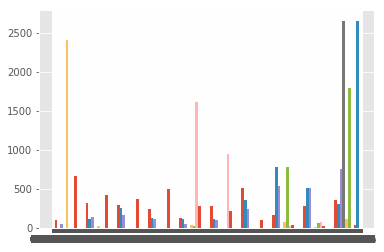

In [93]:
plt.hist(onlineOrderedData[onlineOrderedData.category == 1])

In [43]:
 test = onlineData[onlineData.ordered == 1]

In [44]:
test.groupby(['category']).size()

category
1     2250
2     7435
3    18675
dtype: int64

In [79]:
test.groupby([test.event1]).size()

Series([], dtype: int64)